In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
from enum import Enum 

# generate data
np.random.seed(int(time.time()))
n_samples, n_features = 50, 300
A = np.random.randn(n_samples, n_features)
AT = A.T
coef = 2 * np.random.randn(n_features)
inds = np.arange(n_features)
np.random.shuffle(inds)
coef[inds[10:]]=0
b = np.dot(A, coef) + 0.01 * np.random.normal((n_samples,))

### a
subgradient method(constant step size):

$ \mathbf{x}^{r+1} = \mathbf{x}^r - \alpha [2\mathbf{A}^T(\mathbf{A}\mathbf{x}^r-\mathbf{b})+0.1sign(\mathbf{x}^r) ]$

$\alpha = \frac{||x^* - x^0||}{(L\sqrt{k})} $

$L = ||2\mathbf{A}^T\mathbf{A}||$

proximal method:

$ \mathbf{x}^{r+1} = prox(\mathbf{x}^r - \frac{2}{L}\mathbf{A}^T(\mathbf{A}\mathbf{x}^r-\mathbf{b}))$

$ porx(\mathbf{u}) = sign(\mathbf{u})max\{ |\mathbf{u}|−\frac{1}{L}\times0.1,0\} $

$L = ||2\mathbf{A}^T\mathbf{A}||$


In [ ]:
# preparation
L = 2 * np.linalg.norm(AT@A)

def phi (x):    
    return np.linalg.norm( (A@x) - b, ord=2) ** 2 + 0.1*np.linalg.norm(x, ord=1)
def Jphi(x):    
    return 2* AT@(A@x - b) + 0.1*np.sign(x)
def prox(x):    
    return np.sign(x)*np.max((np.abs(x) - 0.1/L, np.zeros_like(x)), axis=0)

class Method(Enum):
    subgradient_method_with_constant_step = 1
    proximal_method = 2

def subg_update(x,const_alpha):
    return x - const_alpha*Jphi(x)
def prox_update(x): 
    return prox(x - 1/L*2* AT@(A@x - b)) 

In [ ]:
# gradient method
def get_err_arr(phi_list):
    phi_arr = np.array(phi_list)
    phi_star = phi_arr[-1]
    err_arr = (phi_arr[1:-1]-phi_star+0.1)/(phi_arr[:-2]-phi_star+0.1)
    return err_arr

def decent(x0,method,eps=1e-5,max_iter = 1e3 ):
    x=x0
    phix = phi(x)
    x_list,phi_list = [x],[phix]

    const_alpha = np.linalg.norm(coef - x0)/(L * np.sqrt(1e3)) 

    er = 1e5
    it = 0
    while er>eps and it<max_iter:
        it = it + 1
        phix_old = phix
        if method==Method.subgradient_method_with_constant_step:
            x = subg_update(x,const_alpha)
        elif method==Method.proximal_method:
            x = prox_update(x)

        phix = phi(x)
        er = abs(phix-phix_old)

        x_list.append(x)
        phi_list.append(phix)
    
    err_arr = get_err_arr(phi_list)
    return x_list,phi_list,err_arr

In [ ]:
# run
x0 = np.ones_like(coef)
x_sg ,phi_sg ,err_sg = decent(x0,Method.subgradient_method_with_constant_step)
x_pr ,phi_pr ,err_pr = decent(x0,Method.proximal_method)

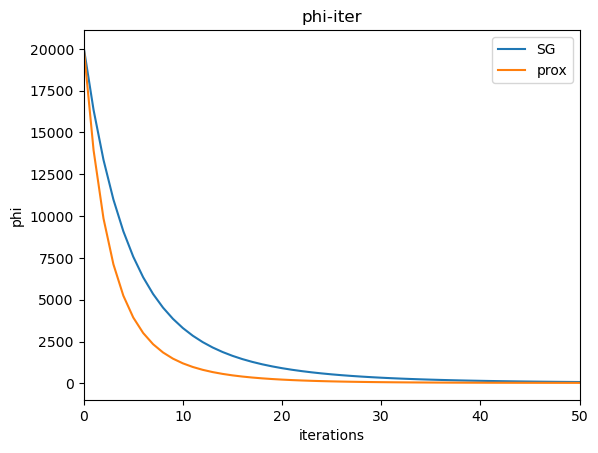

In [ ]:
# phi-iter plot
plt.plot(phi_sg,label="SG")
plt.plot(phi_pr,label="prox")

plt.title("phi-iter")
plt.ylabel ("phi")
plt.xlabel ("iterations")
plt.xlim (0, 50) 
#plt. ylim (-55, -10) 
plt.legend () 
plt.show()

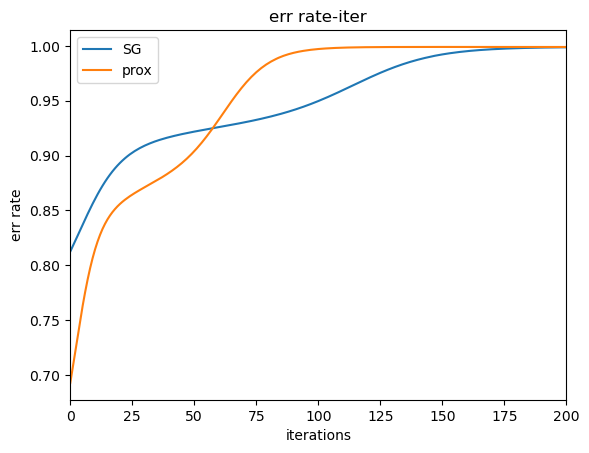

In [ ]:
# err rate-iter plot
plt.plot(err_sg,label="SG")
plt.plot(err_pr,label="prox")

plt.title("err rate-iter")
plt.ylabel ("err rate")
plt.xlabel ("iterations")
plt.xlim (0, 200) 
#plt. ylim (-55, -10) 
plt.legend () 
plt.show()

### b
比较结果如图

可见两种算法都是次线性收敛

从$\phi-iteration$图可以看出proximal method的收敛速度更快，效果更好
